In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
import random
sys.path.append('../..')
from select_sensor import SelectSensor
from utility import generate_intruders

In [2]:
plt.rcParams['font.size'] = 25
filename = '{}-{}-{}.txt'

In [3]:
mean1 = [] # our-miss
mean2 = [] # our-false alarm
std1  = []
std2  = []

num_intru = [1, 3, 5, 7, 10]
for num in num_intru:
    miss = np.loadtxt(filename.format(num, 'ours', 'miss'), delimiter=',')
    false = np.loadtxt(filename.format(num, 'ours', 'false'), delimiter=',')
    mean1.append(miss.mean())
    std1.append(miss.std())
    mean2.append(false.mean())
    std2.append(false.std())

In [4]:
mean3 = [] # SPLOT-miss
mean4 = [] # SPLOT-false
std3  = []
std4  = []

num_intru = [1, 3, 5, 7, 10]
for num in num_intru:
    miss = np.loadtxt(filename.format(num, 'splot', 'miss'), delimiter=',')
    false = np.loadtxt(filename.format(num, 'splot', 'false'), delimiter=',')
    mean3.append(miss.mean())
    std3.append(miss.std())
    mean4.append(false.mean())
    std4.append(false.std())

In [7]:
mean5 = [] # CLUSTER-miss
mean6 = [] # CLUSTER-false
std5  = []
std6  = []

num_intru = [1, 3, 5, 7, 10]
for num in num_intru:
    miss = np.loadtxt(filename.format(num, 'cluster', 'miss'), delimiter=',')
    false = np.loadtxt(filename.format(num, 'cluster', 'false'), delimiter=',')
    mean5.append(miss.mean())
    std5.append(miss.std())
    mean6.append(false.mean())
    std6.append(false.std())

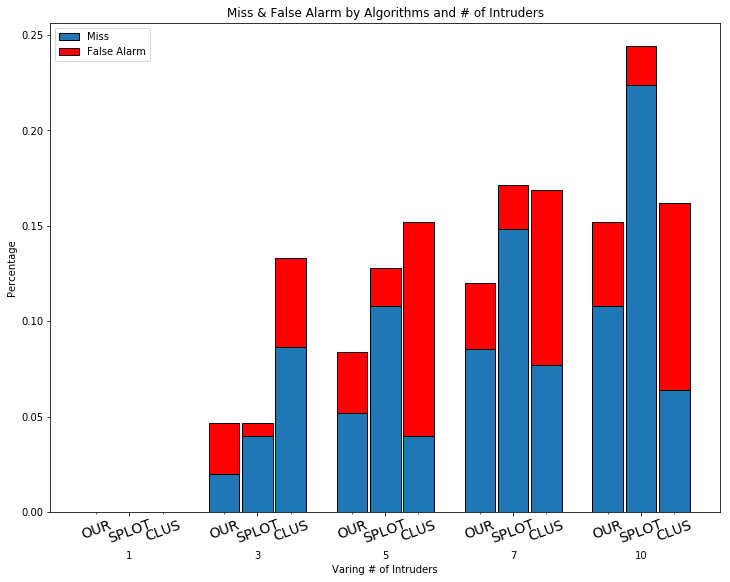

In [8]:
plt.figure(figsize=(12, 9))

N     = 5
ind   = np.arange(N)    # the x locations for the groups
width = 0.24       # the width of the bars: can also be len(x) sequence
b     = 'tab:blue'

pos1 = ind-width-0.02   # position of algo-1's bar
pos2 = ind              # position of algo-2's bar
pos3 = ind+width+0.02   # position of algo-3's bar

p1 = plt.bar(pos1, mean1, width, color= b,  edgecolor='black', label='Miss')
p2 = plt.bar(pos1, mean2, width, color='r', edgecolor='black', bottom=mean1, label='False Alarm')

p3 = plt.bar(pos2, mean3, width, color= b,  edgecolor='black')
p4 = plt.bar(pos2, mean4, width, color='r', edgecolor='black', bottom=mean3)

p5 = plt.bar(pos3, mean5, width, color= b,  edgecolor='black')
p6 = plt.bar(pos3, mean6, width, color='r', edgecolor='black', bottom=mean5)

minor_pos = np.concatenate((pos1, pos2, pos3))
minor_lab = ['OUR']*5 + ['SPLOT']*5 + ['CLUS']*5
ax = plt.gca()
ax.set_xticks(minor_pos, minor=True)
ax.set_xticklabels(minor_lab, minor=True, fontsize=14, rotation=20)

plt.xticks(ind, ('1', '3', '5', '7', '10'))
plt.xlabel('Varing # of Intruders')
ax.tick_params(axis='x', which='major', pad=35)

plt.legend()
plt.ylabel('Percentage')
plt.title('Miss & False Alarm by Algorithms and # of Intruders')
plt.savefig('varyIntruder-miss-false.png')